# Project 6 - APIs + Random Forests

### Problem Statement:
For this project I will be working with movie data from imdb. The goal is to use APIs and scraping in order to obtain the data. After cleaning and mining the data, I will build a random forest model in order to predict whether or not a movie is highly rated.

### Risks / Assumptions:
For this project I will be working with a small sample size and those samples are all of the highest rated movies in imdb. In order to build a better model that would work well on all movies, I would need a bigger sample size that includes movies of all ratings to train my model on.

# Obtaining Data

In order to use the API, I needed to first get the movie IDs for the movies in the imdb top 250. I used webscraping to find those IDs and then inserted the IDs into the API request URLs.

In [176]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

In [1]:
import requests
import json

# request for the page containing the top movies
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)

In [2]:
import bs4
from bs4 import BeautifulSoup

# creating the soup of the page
page_html=response.content
soup = BeautifulSoup(page_html, "lxml")

In [3]:
import re

#finding the movie IDs. All IDs started with 'tt' so I searched for everything that contained that string.
x=soup.findAll('td', class_='titleColumn')
movieURL=[]
for i in x:
    movieURL.append(i.find('a', href=re.compile("tt")).get('href'))

In [4]:
# creating a list of movie IDs
# I extracted the specific characters from each result that contained the ID numbers
movieID=[]
for x in movieURL:
     movieID.append(x[7:16])

In [5]:
# checking the ID list
movieID

['tt0111161',
 'tt0068646',
 'tt0071562',
 'tt0468569',
 'tt0050083',
 'tt0108052',
 'tt0110912',
 'tt0167260',
 'tt0060196',
 'tt0137523',
 'tt0120737',
 'tt0080684',
 'tt0109830',
 'tt1375666',
 'tt0167261',
 'tt0073486',
 'tt0099685',
 'tt0133093',
 'tt0047478',
 'tt0076759',
 'tt0317248',
 'tt0114369',
 'tt0102926',
 'tt0038650',
 'tt0114814',
 'tt0118799',
 'tt0110413',
 'tt0245429',
 'tt0120815',
 'tt0064116',
 'tt0120586',
 'tt0816692',
 'tt0034583',
 'tt0021749',
 'tt0054215',
 'tt0120689',
 'tt1675434',
 'tt0027977',
 'tt0082971',
 'tt0047396',
 'tt0253474',
 'tt0407887',
 'tt0103064',
 'tt0088763',
 'tt2582802',
 'tt0172495',
 'tt0209144',
 'tt0078788',
 'tt0482571',
 'tt0110357',
 'tt3315342',
 'tt0078748',
 'tt0057012',
 'tt0043014',
 'tt0032553',
 'tt0095765',
 'tt0405094',
 'tt0095327',
 'tt0050825',
 'tt1853728',
 'tt0081505',
 'tt0910970',
 'tt0169547',
 'tt1345836',
 'tt0119698',
 'tt0090605',
 'tt0364569',
 'tt0087843',
 'tt3783958',
 'tt0051201',
 'tt0082096',
 'tt00

In [6]:
# testing code to get the json for movies

url_1 = 'http://www.omdbapi.com/?i='
url_2 = '&plot=full'

x=movieID[0]

r = requests.get(url_1+x+url_2)

r.json()

{u'Actors': u'Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler',
 u'Awards': u'Nominated for 7 Oscars. Another 19 wins & 30 nominations.',
 u'Country': u'USA',
 u'Director': u'Frank Darabont',
 u'Genre': u'Crime, Drama',
 u'Language': u'English',
 u'Metascore': u'80',
 u'Plot': u"Chronicles the experiences of a formerly successful banker as a prisoner in the gloomy jailhouse of Shawshank after being found guilty of a crime he did not commit. The film portrays the man's unique way of dealing with his new, torturous life; along the way he befriends a number of fellow prisoners, most notably a wise long-term inmate named Red.",
 u'Poster': u'https://images-na.ssl-images-amazon.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_SX300.jpg',
 u'Rated': u'R',
 u'Released': u'14 Oct 1994',
 u'Response': u'True',
 u'Runtime': u'142 min',
 u'Title': u'The Shawshank Redemption',
 u'Type': u'movie',
 u'Writer': u'Stephen King (short story "Rita Hayworth and Shawshank Redempti

In [7]:
# creating a function that returns the json for each movie

def info(x):
    url_1 = 'http://www.omdbapi.com/?i='
    url_2 = '&plot=full'
    
    r = requests.get(url_1+x+url_2)
    jthing=r.json()
    return jthing

In [8]:
# creating a list and appending all of the json info to it

listx=[]

for x in movieID:
    listx.append(info(x))

In [9]:
import pandas as pd

# turning listx into the dataframe I will use in this project
df=pd.DataFrame(listx)
df.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Poster,Rated,Released,Response,Runtime,Title,Type,Writer,Year,imdbID,imdbRating,imdbVotes
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 19 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Chronicles the experiences of a formerly succe...,https://images-na.ssl-images-amazon.com/images...,R,14 Oct 1994,True,142 min,The Shawshank Redemption,movie,"Stephen King (short story ""Rita Hayworth and S...",1994,tt0111161,9.3,"1,771,273"
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,https://images-na.ssl-images-amazon.com/images...,R,24 Mar 1972,True,175 min,The Godfather,movie,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,tt0068646,9.2,"1,209,397"
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80,The continuing saga of the Corleone crime fami...,https://images-na.ssl-images-amazon.com/images...,R,20 Dec 1974,True,202 min,The Godfather: Part II,movie,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,tt0071562,9.0,"831,783"
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82,Set within a year after the events of Batman B...,https://images-na.ssl-images-amazon.com/images...,PG-13,18 Jul 2008,True,152 min,The Dark Knight,movie,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,tt0468569,9.0,"1,754,213"
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,N/A,The defense and the prosecution have rested an...,https://images-na.ssl-images-amazon.com/images...,APPROVED,01 Apr 1957,True,96 min,12 Angry Men,movie,"Reginald Rose (story), Reginald Rose (screenplay)",1957,tt0050083,8.9,"474,530"


In [10]:
df.shape

(250, 20)

# Data Cleaning / Mining

In [11]:
# creating a dataframe containing just the info relevant to making the model
# I dropped the poster column as well as response, title, type, and imdbID
dfx=df[['Actors','Awards','Country','Director','Genre','Language','Metascore','Plot','Rated','Released','Runtime','Writer','Year','imdbVotes','imdbRating']]

In [12]:
# checking the new df
dfx.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Writer,Year,imdbVotes,imdbRating
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 19 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Chronicles the experiences of a formerly succe...,R,14 Oct 1994,142 min,"Stephen King (short story ""Rita Hayworth and S...",1994,"1,771,273",9.3
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,R,24 Mar 1972,175 min,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,"1,209,397",9.2
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80,The continuing saga of the Corleone crime fami...,R,20 Dec 1974,202 min,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,"831,783",9.0
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82,Set within a year after the events of Batman B...,PG-13,18 Jul 2008,152 min,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,"1,754,213",9.0
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,N/A,The defense and the prosecution have rested an...,APPROVED,01 Apr 1957,96 min,"Reginald Rose (story), Reginald Rose (screenplay)",1957,"474,530",8.9


In [13]:
# double checking shape of dataframe
dfx.shape

(250, 15)

In [14]:
# checking for nulls
dfx.isnull().sum()

Actors        0
Awards        0
Country       0
Director      0
Genre         0
Language      0
Metascore     0
Plot          0
Rated         0
Released      0
Runtime       0
Writer        0
Year          0
imdbVotes     0
imdbRating    0
dtype: int64

In [15]:
# checking value counts for release dates
# I realized that I needed to convert N/As into NaNs
dfx['Released'].value_counts()

16 Apr 1988    2
25 Jun 1982    2
28 Mar 2003    2
N/A            2
14 Oct 1994    2
22 Nov 1995    2
25 Feb 1936    1
15 Aug 1975    1
04 Feb 1994    1
02 Aug 2012    1
19 Sep 1997    1
08 Feb 2002    1
21 Aug 2009    1
15 Aug 1979    1
16 Mar 1963    1
21 May 2010    1
25 Mar 1956    1
04 Nov 1994    1
02 Nov 2011    1
29 Sep 1950    1
12 Apr 1940    1
20 Sep 1967    1
30 Mar 2007    1
31 Aug 1949    1
20 Sep 2013    1
01 Sep 1954    1
23 Feb 1996    1
24 Mar 1972    1
20 Oct 2006    1
21 Nov 1955    1
              ..
12 Jan 2011    1
04 Jan 2002    1
07 Mar 1931    1
16 Feb 1955    1
12 Mar 2010    1
11 Apr 1952    1
04 Nov 2016    1
06 Feb 1958    1
05 Jun 1998    1
28 Aug 1998    1
18 Nov 2005    1
20 Jun 1974    1
10 Feb 1982    1
17 Oct 1985    1
12 Jun 1981    1
24 Oct 1969    1
14 Apr 1959    1
19 Nov 1956    1
05 Apr 1996    1
25 Feb 1994    1
18 Jul 2008    1
24 Jun 1994    1
09 Sep 2011    1
21 Sep 1975    1
22 Sep 1995    1
20 Nov 2015    1
23 Feb 1990    1
20 Dec 1974   

In [16]:
import numpy as np

# replacing N/As with NaNs
dfx=dfx.replace('N/A', np.nan)

In [17]:
dfx.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Writer,Year,imdbVotes,imdbRating
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 19 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Chronicles the experiences of a formerly succe...,R,14 Oct 1994,142 min,"Stephen King (short story ""Rita Hayworth and S...",1994,"1,771,273",9.3
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,R,24 Mar 1972,175 min,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,"1,209,397",9.2
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80,The continuing saga of the Corleone crime fami...,R,20 Dec 1974,202 min,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,"831,783",9.0
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82,Set within a year after the events of Batman B...,PG-13,18 Jul 2008,152 min,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,"1,754,213",9.0
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,NaN,The defense and the prosecution have rested an...,APPROVED,01 Apr 1957,96 min,"Reginald Rose (story), Reginald Rose (screenplay)",1957,"474,530",8.9


In [18]:
# checking for nulls again
dfx.isnull().sum()

Actors         0
Awards         5
Country        0
Director       0
Genre          0
Language       1
Metascore     88
Plot           0
Rated          3
Released       2
Runtime        0
Writer         0
Year           0
imdbVotes      0
imdbRating     0
dtype: int64

In [19]:
# finding the row that had the null in language
dfx[dfx['Language'].isnull()]

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Writer,Year,imdbVotes,imdbRating
155,"George O'Brien, Janet Gaynor, Margaret Livings...",Won 3 Oscars. Another 2 wins & 2 nominations.,USA,F.W. Murnau,"Drama, Romance",NaN,NaN,An allegorical tale about a man fighting the g...,NOT RATED,04 Nov 1927,94 min,"Carl Mayer (scenario), Hermann Sudermann (from...",1927,"31,257",8.3


In [20]:
df.iloc[155,:]

Actors        George O'Brien, Janet Gaynor, Margaret Livings...
Awards            Won 3 Oscars. Another 2 wins & 2 nominations.
Country                                                     USA
Director                                            F.W. Murnau
Genre                                            Drama, Romance
Language                                                    N/A
Metascore                                                   N/A
Plot          An allegorical tale about a man fighting the g...
Poster        https://images-na.ssl-images-amazon.com/images...
Rated                                                 NOT RATED
Released                                            04 Nov 1927
Response                                                   True
Runtime                                                  94 min
Title                                                   Sunrise
Type                                                      movie
Writer        Carl Mayer (scenario), Her

In [21]:
# The movie was a silent movie and therefore no language is actually heard in the movie
# so I inserted 'None' into the cell

dfx.iloc[155, 5] = 'None'

In [22]:
# checking to see if my insertion worked
dfx.iloc[155,:]

Actors        George O'Brien, Janet Gaynor, Margaret Livings...
Awards            Won 3 Oscars. Another 2 wins & 2 nominations.
Country                                                     USA
Director                                            F.W. Murnau
Genre                                            Drama, Romance
Language                                                   None
Metascore                                                   NaN
Plot          An allegorical tale about a man fighting the g...
Rated                                                 NOT RATED
Released                                            04 Nov 1927
Runtime                                                  94 min
Writer        Carl Mayer (scenario), Hermann Sudermann (from...
Year                                                       1927
imdbVotes                                                31,257
imdbRating                                                  8.3
Name: 155, dtype: object

In [23]:
# Finding the rows with missing movie Ratings
dfx[dfx['Rated'].isnull()]

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Writer,Year,imdbVotes,imdbRating
96,"Fikret Kuskan, Çetin Tekindor, Hümeyra, Serif ...",11 wins & 1 nomination.,Turkey,Çagan Irmak,Drama,Turkish,NaN,The family of a left-wing journalist is torn a...,NaN,18 Nov 2005,108 min,Çagan Irmak,2005,"40,701",8.7
150,"Sener Sen, Ugur Yücel, Sermin Hürmeriç, Yesim ...",2 wins.,"Turkey, France, Bulgaria",Yavuz Turgul,"Crime, Drama, Thriller",Turkish,NaN,The epic adventures of the legendary Baran the...,NaN,29 Nov 1996,128 min,Yavuz Turgul,1996,"37,760",8.5
244,"Manoj Bajpayee, Richa Chadha, Nawazuddin Siddi...",10 wins & 32 nominations.,India,Anurag Kashyap,"Action, Crime, Drama",Hindi,89,Shahid Khan is exiled after impersonating the ...,NaN,02 Aug 2012,320 min,"Akhilesh Jaiswal, Anurag Kashyap, Sachin K. La...",2012,"50,643",8.3


In [24]:
df.iloc[96,:]

Actors        Fikret Kuskan, Çetin Tekindor, Hümeyra, Serif ...
Awards                                  11 wins & 1 nomination.
Country                                                  Turkey
Director                                            Çagan Irmak
Genre                                                     Drama
Language                                                Turkish
Metascore                                                   N/A
Plot          The family of a left-wing journalist is torn a...
Poster        https://images-na.ssl-images-amazon.com/images...
Rated                                                       N/A
Released                                            18 Nov 2005
Response                                                   True
Runtime                                                 108 min
Title                                      My Father and My Son
Type                                                      movie
Writer                                  

In [25]:
# After searching online for ratings for the 3 movies, I could not find one so
# I decided to list them as 'NOT RATED'
dfx.iloc[96, 8] = 'NOT RATED'

In [26]:
df.iloc[150,:]

Actors        Sener Sen, Ugur Yücel, Sermin Hürmeriç, Yesim ...
Awards                                                  2 wins.
Country                                Turkey, France, Bulgaria
Director                                           Yavuz Turgul
Genre                                    Crime, Drama, Thriller
Language                                                Turkish
Metascore                                                   N/A
Plot          The epic adventures of the legendary Baran the...
Poster        https://images-na.ssl-images-amazon.com/images...
Rated                                                       N/A
Released                                            29 Nov 1996
Response                                                   True
Runtime                                                 128 min
Title                                                The Bandit
Type                                                      movie
Writer                                  

In [27]:
dfx.iloc[150, 8] = 'NOT RATED'

In [28]:
df.iloc[244,:]

Actors        Manoj Bajpayee, Richa Chadha, Nawazuddin Siddi...
Awards                                10 wins & 32 nominations.
Country                                                   India
Director                                         Anurag Kashyap
Genre                                      Action, Crime, Drama
Language                                                  Hindi
Metascore                                                    89
Plot          Shahid Khan is exiled after impersonating the ...
Poster        https://images-na.ssl-images-amazon.com/images...
Rated                                                       N/A
Released                                            02 Aug 2012
Response                                                   True
Runtime                                                 320 min
Title                                        Gangs of Wasseypur
Type                                                      movie
Writer        Akhilesh Jaiswal, Anurag K

In [29]:
dfx.iloc[244, 8] = 'NOT RATED'

In [30]:
dfx['Released'].value_counts()

16 Apr 1988    2
25 Jun 1982    2
28 Mar 2003    2
14 Oct 1994    2
22 Nov 1995    2
23 Feb 1996    1
15 Aug 1975    1
04 Feb 1994    1
19 Jan 2007    1
02 Aug 2012    1
19 Sep 1997    1
08 Feb 2002    1
21 Aug 2009    1
15 Aug 1979    1
16 Mar 1963    1
25 Mar 1956    1
21 May 2010    1
04 Nov 1994    1
29 Sep 1950    1
25 Feb 1936    1
20 Sep 1967    1
02 Nov 2001    1
30 Mar 2007    1
02 Nov 2011    1
20 Sep 2013    1
01 Sep 1954    1
20 Oct 2006    1
21 Nov 1955    1
17 Dec 2003    1
08 May 2002    1
              ..
12 Jan 2011    1
04 Jan 2002    1
07 Mar 1931    1
16 Feb 1955    1
12 Mar 2010    1
11 Apr 1952    1
04 Nov 2016    1
06 Feb 1958    1
05 Jun 1998    1
28 Aug 1998    1
18 Nov 2005    1
20 Jun 1974    1
10 Feb 1982    1
17 Oct 1985    1
12 Jun 1981    1
24 Oct 1969    1
14 Apr 1959    1
19 Nov 1956    1
05 Apr 1996    1
25 Feb 1994    1
18 Jul 2008    1
24 Jun 1994    1
09 Sep 2011    1
21 Sep 1975    1
22 Sep 1995    1
20 Nov 2015    1
23 Feb 1990    1
20 Dec 1974   

In [31]:
# Finding movies with no release dates listed
dfx[dfx['Released'].isnull()]

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Writer,Year,imdbVotes,imdbRating
129,"Anatoliy Solonitsyn, Ivan Lapikov, Nikolay Gri...",3 wins.,Soviet Union,Andrei Tarkovsky,"Biography, Drama, History","Russian, Italian, Tatar",NaN,"The life, times and afflictions of the fifteen...",NOT RATED,NaN,205 min,"Andrey Konchalovskiy, Andrei Tarkovsky",1966,"24,697",8.4
135,"Charles Chaplin, Mack Swain, Tom Murray, Henry...",Nominated for 2 Oscars. Another 3 wins & 1 nom...,USA,Charles Chaplin,"Adventure, Comedy, Drama",English,NaN,A lone prospector ventures into Alaska looking...,NOT RATED,NaN,95 min,Charles Chaplin,1925,"71,750",8.2


In [32]:
# For this movie I could not find it's original release date, but I found a US release date
# I decided to use that instead and changed the year column for that row to reflect the change
dfx.iloc[129, 9] = '01 Jan 1973'
dfx.iloc[129, 12] = '1973'

In [33]:
# Found the release date online and inserted it
dfx.iloc[135, 9] = '26 Jun 1925'

In [34]:
# converting all entries in the column to datetime
dfx['Released']=pd.to_datetime(dfx['Released'])

In [35]:
dfx.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Writer,Year,imdbVotes,imdbRating
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 19 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Chronicles the experiences of a formerly succe...,R,1994-10-14,142 min,"Stephen King (short story ""Rita Hayworth and S...",1994,"1,771,273",9.3
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,R,1972-03-24,175 min,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,"1,209,397",9.2
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80,The continuing saga of the Corleone crime fami...,R,1974-12-20,202 min,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,"831,783",9.0
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82,Set within a year after the events of Batman B...,PG-13,2008-07-18,152 min,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,"1,754,213",9.0
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,NaN,The defense and the prosecution have rested an...,APPROVED,1957-04-01,96 min,"Reginald Rose (story), Reginald Rose (screenplay)",1957,"474,530",8.9


In [36]:
# creating a column for release month
dfx['Month'] = pd.DatetimeIndex(dfx['Released']).month

In [37]:
# creating a column for release day
dfx['Day'] = pd.DatetimeIndex(dfx['Released']).day

In [38]:
dfx.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Writer,Year,imdbVotes,imdbRating,Month,Day
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 19 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Chronicles the experiences of a formerly succe...,R,1994-10-14,142 min,"Stephen King (short story ""Rita Hayworth and S...",1994,"1,771,273",9.3,10,14
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,R,1972-03-24,175 min,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,"1,209,397",9.2,3,24
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80,The continuing saga of the Corleone crime fami...,R,1974-12-20,202 min,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,"831,783",9.0,12,20
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82,Set within a year after the events of Batman B...,PG-13,2008-07-18,152 min,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,"1,754,213",9.0,7,18
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,NaN,The defense and the prosecution have rested an...,APPROVED,1957-04-01,96 min,"Reginald Rose (story), Reginald Rose (screenplay)",1957,"474,530",8.9,4,1


In [39]:
dfx['Runtime'].value_counts()

129 min    7
130 min    6
116 min    6
136 min    5
131 min    5
107 min    5
110 min    5
120 min    5
98 min     5
125 min    4
89 min     4
102 min    4
99 min     4
121 min    4
101 min    4
138 min    4
124 min    4
108 min    4
93 min     4
128 min    4
153 min    4
122 min    4
132 min    4
95 min     4
117 min    4
126 min    3
94 min     3
113 min    3
146 min    3
96 min     3
          ..
180 min    1
202 min    1
216 min    1
229 min    1
152 min    1
186 min    1
157 min    1
184 min    1
81 min     1
205 min    1
83 min     1
67 min     1
179 min    1
195 min    1
104 min    1
320 min    1
150 min    1
224 min    1
151 min    1
141 min    1
106 min    1
212 min    1
189 min    1
114 min    1
68 min     1
158 min    1
111 min    1
201 min    1
177 min    1
207 min    1
Name: Runtime, dtype: int64

In [40]:
# stripping the column down so that only strings of the numbers remain
dfx['Runtime'] = dfx['Runtime'].map(lambda x: x.rstrip(' min'))

In [41]:
# converting those strings into integers
dfx['Runtime']=dfx['Runtime'].astype(int)

In [42]:
# converting the column to int
dfx['Year']=dfx['Year'].astype(int)

In [43]:
# stripping the commas out of the column to get just the string of the numbers
dfx['imdbVotes']=dfx['imdbVotes'].str.replace(',','')

In [44]:
# converting the column to int
dfx['imdbVotes']=dfx['imdbVotes'].astype(int)

In [45]:
dfx.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Writer,Year,imdbVotes,imdbRating,Month,Day
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 19 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80,Chronicles the experiences of a formerly succe...,R,1994-10-14,142,"Stephen King (short story ""Rita Hayworth and S...",1994,1771273,9.3,10,14
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100,The aging patriarch of an organized crime dyna...,R,1972-03-24,175,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,1209397,9.2,3,24
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80,The continuing saga of the Corleone crime fami...,R,1974-12-20,202,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,831783,9.0,12,20
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82,Set within a year after the events of Batman B...,PG-13,2008-07-18,152,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,1754213,9.0,7,18
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,NaN,The defense and the prosecution have rested an...,APPROVED,1957-04-01,96,"Reginald Rose (story), Reginald Rose (screenplay)",1957,474530,8.9,4,1


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# using count vectorizer on the actors column
cvec = CountVectorizer(token_pattern='(?u)\w+.?\w?.? \w+')
cvec.fit(dfx['Actors'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\w+.?\\w?.? \\w+',
        tokenizer=None, vocabulary=None)

In [47]:
# getting a dataframe of all of the names
dfa  = pd.DataFrame(cvec.transform(dfx['Actors']).todense(),
             columns=cvec.get_feature_names())

dfa.head()

,aamir khan,aaron eckhart,abdel ahmed,"abraham, mathieu","abraham, tom",adam baldwin,adam driver,adolphe menjou,adrien brody,agnes moorehead,...,woody allen,xolani mali,yacef saadi,yesim salkim,yoshiko shinohara,yukiko shimazaki,yves montand,yôko tsukasa,zach grenier,çetin tekindor
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# finding the most frequently occuring actors on the list
dfa.sum().sort_values(ascending=False).head(20)

robert de niro       7
harrison ford        7
aamir khan           6
tom hanks            6
leonardo dicaprio    6
clint eastwood       5
al pacino            4
charles chaplin      4
morgan freeman       4
carrie fisher        4
mark hamill          4
james stewart        4
joe pesci            4
christian bale       4
bruce willis         3
sean astin           3
steve buscemi        3
ben kingsley         3
takashi shimura      3
russell crowe        3
dtype: int64

In [49]:
# creating a dataframe containing the 20 most frequently occuring actors
# these will be my features for actors
dfa2=dfa[['robert de niro','harrison ford','aamir khan', 'tom hanks','leonardo dicaprio','clint eastwood',
          'al pacino','charles chaplin','morgan freeman','carrie fisher','mark hamill', 'james stewart', 
          'joe pesci', 'christian bale', 'bruce willis', 'sean astin','steve buscemi','ben kingsley','takashi shimura',
          'russell crowe']]

In [50]:
dfa2.head()

,robert de niro,harrison ford,aamir khan,tom hanks,leonardo dicaprio,clint eastwood,al pacino,charles chaplin,morgan freeman,carrie fisher,mark hamill,james stewart,joe pesci,christian bale,bruce willis,sean astin,steve buscemi,ben kingsley,takashi shimura,russell crowe
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [51]:
# using count vectorizer for countries
cvec2 = CountVectorizer()
cvec2.fit(dfx['Country'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [52]:
# getting df of all countries
dfc  = pd.DataFrame(cvec2.transform(dfx['Country']).todense(),
             columns=cvec2.get_feature_names())

dfc.head()

,africa,algeria,arab,argentina,australia,austria,belgium,brazil,bulgaria,canada,...,spain,sweden,switzerland,turkey,uk,union,united,usa,west,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
dfc.sum().sort_values(ascending=False).head(20)

usa          178
uk            41
france        21
germany       17
india         14
italy         13
japan         12
spain          5
canada         4
sweden         4
ireland        4
zealand        3
west           3
australia      3
hong           3
kong           3
union          3
new            3
soviet         3
south          3
dtype: int64

In [54]:
# making df of most frequently occuring countries to use as features in the model
dfc2=dfc[['usa','uk','france','germany','india','italy','japan']]
dfc2.head()

,usa,uk,france,germany,india,italy,japan
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [55]:
# checking the most frequently occuring directors
dfx['Director'].value_counts().head(20)

Alfred Hitchcock        7
Stanley Kubrick         7
Christopher Nolan       7
Steven Spielberg        7
Martin Scorsese         7
Akira Kurosawa          5
Billy Wilder            5
Hayao Miyazaki          5
Charles Chaplin         5
Sergio Leone            4
Quentin Tarantino       4
David Fincher           3
Francis Ford Coppola    3
James Cameron           3
Clint Eastwood          3
Frank Capra             3
Sidney Lumet            3
Ridley Scott            3
Ingmar Bergman          3
Peter Jackson           3
Name: Director, dtype: int64

In [56]:
# using count vectorizer on the directors column
cvec3 = CountVectorizer(token_pattern='(?u)\w+.?\w?.? \w+')
cvec3.fit(dfx['Director'])

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\w+.?\\w?.? \\w+',
        tokenizer=None, vocabulary=None)

In [57]:
# getting the df of all directors
dfd  = pd.DataFrame(cvec3.transform(dfx['Director']).todense(),
             columns=cvec3.get_feature_names())

dfd.head()

,aamir khan,adam elliot,akira kurosawa,alan mak,alejandro g. iñárritu,alfred hitchcock,amole gupte,andrei tarkovsky,andrew stanton,anurag kashyap,...,vittorio de sica,von donnersmarck,wes anderson,william wyler,wolfgang petersen,woody allen,wook park,yasujirô ozu,yavuz turgul,çagan irmak
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
dfd.sum().sort_values(ascending=False).head(20)

stanley kubrick      7
martin scorsese      7
steven spielberg     7
alfred hitchcock     7
christopher nolan    7
quentin tarantino    6
akira kurosawa       5
hayao miyazaki       5
charles chaplin      5
billy wilder         5
sergio leone         4
ingmar bergman       3
lee unkrich          3
david fincher        3
pete docter          3
peter jackson        3
ridley scott         3
francis ford         3
ethan coen           3
clint eastwood       3
dtype: int64

In [59]:
# making a df of the top 20 most occuring directors to use as features in the model
dfd2=dfd[['stanley kubrick','martin scorsese','steven spielberg', 'alfred hitchcock','christopher nolan','quentin tarantino',
          'akira kurosawa','hayao miyazaki','charles chaplin','billy wilder','sergio leone', 'ingmar bergman', 
          'lee unkrich', 'david fincher', 'pete docter', 'peter jackson','ridley scott','francis ford','ethan coen',
          'clint eastwood']]

In [60]:
dfd2.head()

,stanley kubrick,martin scorsese,steven spielberg,alfred hitchcock,christopher nolan,quentin tarantino,akira kurosawa,hayao miyazaki,charles chaplin,billy wilder,sergio leone,ingmar bergman,lee unkrich,david fincher,pete docter,peter jackson,ridley scott,francis ford,ethan coen,clint eastwood
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
# using count vectorizer and creating a df of all genres

cvec4 = CountVectorizer()
cvec4.fit(dfx['Genre'])

dfg  = pd.DataFrame(cvec4.transform(dfx['Genre']).todense(),
             columns=cvec4.get_feature_names())

dfg.head()

,action,adventure,animation,biography,comedy,crime,drama,family,fantasy,fi,...,music,musical,mystery,noir,romance,sci,sport,thriller,war,western
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
dfg.sum().sort_values(ascending=False).head(20)

drama        177
crime         60
adventure     58
comedy        44
thriller      40
action        32
mystery       32
biography     25
fantasy       22
sci           22
fi            22
romance       21
war           21
animation     18
history       18
family        14
film           7
noir           7
western        6
horror         5
dtype: int64

In [63]:
# making a df of most occuring genres to use as features
dfg2=dfg[['drama','crime','adventure','comedy','thriller','action','mystery','biography','fantasy','sci','romance',
          'war','animation','history','family']]

In [64]:
dfg2.head()

,drama,crime,adventure,comedy,thriller,action,mystery,biography,fantasy,sci,romance,war,animation,history,family
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
# using count vectorizer and making a df of all of the languages used in movies
cvec5 = CountVectorizer()
cvec5.fit(dfx['Language'])

dfl  = pd.DataFrame(cvec5.transform(dfx['Language']).todense(),
             columns=cvec5.get_feature_names())

dfl.head()

,american,arabic,awadhi,belarusian,cantonese,czech,danish,english,esperanto,french,...,swahili,swedish,tatar,thai,turkish,urdu,vietnamese,xhosa,yiddish,zulu
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
dfl.sum().sort_values(ascending=False).head(20)

english       207
french         40
german         31
spanish        29
italian        22
japanese       18
russian        15
hindi          12
latin          10
arabic          8
vietnamese      4
cantonese       4
hungarian       3
hebrew          3
swedish         3
sindarin        3
turkish         3
gaelic          2
urdu            2
irish           2
dtype: int64

In [67]:
# making a df of the most occuring languages in the movies
dfl2=dfl[['english','french','german','spanish','italian','japanese','russian','hindi','latin']]
dfl2.head()

,english,french,german,spanish,italian,japanese,russian,hindi,latin
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1
2,1,0,0,1,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


In [68]:
dfx['Rated'].value_counts()

R            101
PG            38
NOT RATED     34
PG-13         30
APPROVED      20
G             13
UNRATED       10
PASSED         4
Name: Rated, dtype: int64

In [69]:
# used get_dummies to turn the Rated column into variables
dfr=pd.get_dummies(dfx['Rated'])

In [70]:
dfr.head()

,APPROVED,G,NOT RATED,PASSED,PG,PG-13,R,UNRATED
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# made a df of Ratings to use as variables. dropped PASSED
dfr2=dfr[['R','PG','NOT RATED','PG-13','APPROVED','G','UNRATED']]

In [72]:
# used TFIDF vectorizer on the plot column

from sklearn.feature_extraction.text import TfidfVectorizer
cvec6 = TfidfVectorizer(stop_words='english',max_features=20)
cvec6.fit(dfx['Plot'])

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=20, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [73]:
# df of the 20 most important words for use in the model
dfp  = pd.DataFrame(cvec6.transform(dfx['Plot']).todense(),
             columns=cvec6.get_feature_names())

dfp.head()

,city,day,family,father,life,love,man,named,new,old,people,police,story,time,war,way,wife,world,years,young
0,0.000000,0.0,0.000000,0.000000,0.298924,0.000000,0.296761,0.385059,0.346708,0.0,0.0,0.0,0.000000,0.0,0.0,0.744379,0.0,0.0,0.0,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2,0.000000,0.0,0.787052,0.000000,0.000000,0.000000,0.000000,0.000000,0.350129,0.0,0.0,0.0,0.367925,0.0,0.0,0.000000,0.0,0.0,0.0,0.350129
3,0.464459,0.0,0.000000,0.000000,0.000000,0.429936,0.000000,0.000000,0.774230,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
4,0.000000,0.0,0.000000,0.541696,0.000000,0.000000,0.427169,0.000000,0.000000,0.0,0.0,0.0,0.524430,0.0,0.0,0.000000,0.0,0.0,0.0,0.499064


In [74]:
# checking nulls again
dfx.isnull().sum()

Actors         0
Awards         5
Country        0
Director       0
Genre          0
Language       0
Metascore     88
Plot           0
Rated          0
Released       0
Runtime        0
Writer         0
Year           0
imdbVotes      0
imdbRating     0
Month          0
Day            0
dtype: int64

In [75]:
# changing column to numeric
dfx['Metascore']=pd.to_numeric(dfx['Metascore'])

In [76]:
# finding mean of the metascores to use for imputation
dfx['Metascore'].mean()

80.30246913580247

In [77]:
# rounded the mean down to 80 and using that to impute missing metascores
dfx['Metascore'].fillna(80, inplace=True)

In [78]:
dfx.isnull().sum()

Actors        0
Awards        5
Country       0
Director      0
Genre         0
Language      0
Metascore     0
Plot          0
Rated         0
Released      0
Runtime       0
Writer        0
Year          0
imdbVotes     0
imdbRating    0
Month         0
Day           0
dtype: int64

In [79]:
# I'm assuming movies with missing values in Awards did not win any awards
# so im filling the cells with 'None'
dfx['Awards'].fillna('None', inplace=True)

In [80]:
dfx.isnull().sum()

Actors        0
Awards        0
Country       0
Director      0
Genre         0
Language      0
Metascore     0
Plot          0
Rated         0
Released      0
Runtime       0
Writer        0
Year          0
imdbVotes     0
imdbRating    0
Month         0
Day           0
dtype: int64

In [81]:
# splitting the column on spaces
dfawards=dfx['Awards'].str.split(' ')

In [82]:
# creating a df out of it
dfawards=pd.DataFrame(dfawards)

In [83]:
# putting the first word in its own column
dfawards['1']=dfawards['Awards'].apply(lambda x: x[0])

In [84]:
# doing the same with words 2 and 3
dfawards['2']=dfawards['Awards'].apply(lambda x: x[1] if len(x)>1 else np.NaN)
dfawards['3']=dfawards['Awards'].apply(lambda x: x[2] if len(x)>2 else np.NaN)

In [85]:
# resulting df for awards
dfawards.head()

,Awards,1,2,3
0,"[Nominated, for, 7, Oscars., Another, 19, wins...",Nominated,for,7
1,"[Won, 3, Oscars., Another, 23, wins, &, 27, no...",Won,3,Oscars.
2,"[Won, 6, Oscars., Another, 10, wins, &, 20, no...",Won,6,Oscars.
3,"[Won, 2, Oscars., Another, 146, wins, &, 142, ...",Won,2,Oscars.
4,"[Nominated, for, 3, Oscars., Another, 16, wins...",Nominated,for,3


In [86]:
# creating a list for number of oscars each movie won
winlist=[]

for i in dfawards['Awards']:
    if i[0]=='Won':
        try:
            winlist.append(i[1])
        except:
            winlist.append(0)
    else:
        winlist.append(0)

In [87]:
# checking list
winlist

[0,
 u'3',
 u'6',
 u'2',
 0,
 u'7',
 u'1',
 u'11',
 0,
 0,
 u'4',
 u'1',
 u'6',
 u'4',
 u'2',
 u'5',
 u'1',
 u'4',
 0,
 u'6',
 0,
 0,
 u'5',
 0,
 u'2',
 u'3',
 0,
 u'1',
 u'5',
 0,
 0,
 u'1',
 u'3',
 0,
 0,
 0,
 0,
 0,
 u'4',
 0,
 u'3',
 u'4',
 u'4',
 u'1',
 u'3',
 u'5',
 0,
 u'2',
 0,
 u'2',
 0,
 u'1',
 0,
 u'3',
 0,
 u'1',
 u'1',
 0,
 0,
 u'2',
 0,
 u'1',
 u'5',
 0,
 0,
 u'2',
 0,
 0,
 0,
 0,
 0,
 u'1',
 0,
 0,
 0,
 0,
 u'5',
 0,
 0,
 0,
 0,
 0,
 0,
 u'7',
 0,
 u'1',
 u'3',
 u'8',
 u'2',
 0,
 0,
 u'7',
 u'1',
 0,
 0,
 0,
 0,
 0,
 u'1',
 0,
 0,
 0,
 u'2',
 0,
 0,
 0,
 u'5',
 u'2',
 0,
 u'1',
 u'1',
 0,
 u'6',
 0,
 0,
 u'2',
 u'1',
 u'3',
 u'4',
 0,
 u'2',
 0,
 u'1',
 0,
 0,
 0,
 u'1',
 u'3',
 0,
 0,
 u'1',
 0,
 u'1',
 u'8',
 u'1',
 0,
 u'1',
 u'7',
 0,
 0,
 u'1',
 0,
 0,
 0,
 u'2',
 0,
 u'4',
 u'2',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 u'3',
 0,
 0,
 0,
 0,
 0,
 u'5',
 0,
 0,
 u'2',
 u'8',
 0,
 u'1',
 0,
 0,
 u'4',
 u'1',
 u'2',
 0,
 0,
 u'2',
 0,
 0,
 0,
 0,
 0,
 u'5',
 0,
 0,
 u'4',
 0,
 0,

In [88]:
# creating a column with the list
dfawards['OscarWins']=winlist

In [89]:
# creating a list with all of the oscar noms
# i'm making the assumption that oscar wins = oscar noms as well
nomlist=[]

for i in dfawards['Awards']:
    if i[0]=='Nominated':
        try:
            nomlist.append(i[2])
        except:
            nomlist.append(0)
    else:
        try:
            if len(i[1])<3:
                nomlist.append(i[1])
            else:
                nomlist.append(0)
        except:
            nomlist.append(0)
        
dfawards['OscarNoms']=nomlist

In [90]:
# resulting df
dfawards.head()

,Awards,1,2,3,OscarWins,OscarNoms
0,"[Nominated, for, 7, Oscars., Another, 19, wins...",Nominated,for,7,0,7
1,"[Won, 3, Oscars., Another, 23, wins, &, 27, no...",Won,3,Oscars.,3,3
2,"[Won, 6, Oscars., Another, 10, wins, &, 20, no...",Won,6,Oscars.,6,6
3,"[Won, 2, Oscars., Another, 146, wins, &, 142, ...",Won,2,Oscars.,2,2
4,"[Nominated, for, 3, Oscars., Another, 16, wins...",Nominated,for,3,0,3


In [91]:
dfawards['OscarWins']=dfawards['OscarWins'].astype(int)

In [92]:
dfawards['OscarNoms']=dfawards['OscarNoms'].astype(int)

In [93]:
# creating the final dataframe for awards that i'll use as features in the model
WinsNoms=dfawards[['OscarWins','OscarNoms']]
WinsNoms.head()

,OscarWins,OscarNoms
0,0,7
1,3,3
2,6,6
3,2,2
4,0,3


In [94]:
# splitting the column into individual words
dfwriter=dfx['Writer'].str.split(' ')

In [95]:
dfwriter.head()

0    [Stephen, King, (short, story, "Rita, Hayworth...
1    [Mario, Puzo, (screenplay),, Francis, Ford, Co...
2    [Francis, Ford, Coppola, (screenplay),, Mario,...
3    [Jonathan, Nolan, (screenplay),, Christopher, ...
4    [Reginald, Rose, (story),, Reginald, Rose, (sc...
Name: Writer, dtype: object

In [96]:
# creating a list of the first and last names of writers
# I only used the first names listed
dfwlist=[]

for i in dfwriter:
    dfwlist.append(i[0]+' '+i[1])

In [97]:
# checking the most frequently occuring writers
dfw=pd.DataFrame(dfwlist)
dfw[0] = dfw[0].str.replace(',', '')
dfw[0].value_counts().head(20)

Quentin Tarantino    5
Stanley Kubrick      5
Hayao Miyazaki       5
Charles Chaplin      5
Akira Kurosawa       4
Jonathan Nolan       4
Stephen King         4
Lawrence Kasdan      3
J.R.R. Tolkien       3
Billy Wilder         3
Ingmar Bergman       3
James Cameron        3
Pete Docter          3
Oliver Stone         2
John Huston          2
Ethan Coen           2
Nicholas Pileggi     2
Lilly Wachowski      2
Andrew Stanton       2
Damien Chazelle      2
Name: 0, dtype: int64

In [98]:
dfw.shape

(250, 1)

In [99]:
# creating columns for each of the writers
dfw['W_Quentin Tarantino']=dfw[0].apply(lambda x: 1 if x=='Quentin Tarantino' else 0)
dfw['W_Stanley Kubrick']=dfw[0].apply(lambda x: 1 if x=='Stanley Kubrick' else 0)
dfw['W_Hayao Miyazaki']=dfw[0].apply(lambda x: 1 if x=='Hayao Miyazaki' else 0)
dfw['W_Charles Chaplin']=dfw[0].apply(lambda x: 1 if x=='Charles Chaplin' else 0)
dfw['W_Akira Kurosawa']=dfw[0].apply(lambda x: 1 if x=='Akira Kurosawa' else 0)
dfw['W_Jonathan Nolan']=dfw[0].apply(lambda x: 1 if x=='Jonathan Nolan' else 0)
dfw['W_Stephen King']=dfw[0].apply(lambda x: 1 if x=='Stephen King' else 0)
dfw['W_Lawrence Kasdan']=dfw[0].apply(lambda x: 1 if x=='Lawrence Kasdan' else 0)
dfw['W_J.R.R. Tolkien']=dfw[0].apply(lambda x: 1 if x=='J.R.R. Tolkien' else 0)
dfw['W_Billy Wilder']=dfw[0].apply(lambda x: 1 if x=='Billy Wilder' else 0)
dfw['W_Ingmar Bergman ']=dfw[0].apply(lambda x: 1 if x=='Ingmar Bergman ' else 0)
dfw['W_James Cameron']=dfw[0].apply(lambda x: 1 if x=='James Cameron' else 0)
dfw['W_Pete Docter']=dfw[0].apply(lambda x: 1 if x=='Pete Docter' else 0)
dfw['W_Oliver Stone']=dfw[0].apply(lambda x: 1 if x=='Oliver Stone' else 0)
dfw['W_John Huston']=dfw[0].apply(lambda x: 1 if x=='John Huston' else 0)
dfw['W_Ethan Coen']=dfw[0].apply(lambda x: 1 if x=='Ethan Coen' else 0)
dfw['W_Nicholas Pileggi']=dfw[0].apply(lambda x: 1 if x=='Nicholas Pileggi' else 0)
dfw['W_Lilly Wachowski']=dfw[0].apply(lambda x: 1 if x=='Lilly Wachowski' else 0)
dfw['W_Andrew Stanton']=dfw[0].apply(lambda x: 1 if x=='Andrew Stanton' else 0)
dfw['W_Damien Chazelle']=dfw[0].apply(lambda x: 1 if x=='Damien Chazelle' else 0)


In [100]:
dfw.head()

,0,W_Quentin Tarantino,W_Stanley Kubrick,W_Hayao Miyazaki,W_Charles Chaplin,W_Akira Kurosawa,W_Jonathan Nolan,W_Stephen King,W_Lawrence Kasdan,W_J.R.R. Tolkien,...,W_Ingmar Bergman,W_James Cameron,W_Pete Docter,W_Oliver Stone,W_John Huston,W_Ethan Coen,W_Nicholas Pileggi,W_Lilly Wachowski,W_Andrew Stanton,W_Damien Chazelle
0,Stephen King,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Mario Puzo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Francis Ford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Jonathan Nolan,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Reginald Rose,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
dfw2=dfw.iloc[:,1:]

In [103]:
# the final writer df that i'll use as the features for the model
dfw2.head()

,W_Quentin Tarantino,W_Stanley Kubrick,W_Hayao Miyazaki,W_Charles Chaplin,W_Akira Kurosawa,W_Jonathan Nolan,W_Stephen King,W_Lawrence Kasdan,W_J.R.R. Tolkien,W_Billy Wilder,W_Ingmar Bergman,W_James Cameron,W_Pete Docter,W_Oliver Stone,W_John Huston,W_Ethan Coen,W_Nicholas Pileggi,W_Lilly Wachowski,W_Andrew Stanton,W_Damien Chazelle
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
dfx.head(1)

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Writer,Year,imdbVotes,imdbRating,Month,Day
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 19 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.0,Chronicles the experiences of a formerly succe...,R,1994-10-14,142,"Stephen King (short story ""Rita Hayworth and S...",1994,1771273,9.3,10,14


In [106]:
dfx.isnull().sum()

Actors        0
Awards        0
Country       0
Director      0
Genre         0
Language      0
Metascore     0
Plot          0
Rated         0
Released      0
Runtime       0
Writer        0
Year          0
imdbVotes     0
imdbRating    0
Month         0
Day           0
dtype: int64

In [134]:
# checking the distribution of imdbRatings
dfx['imdbRating']=dfx['imdbRating'].astype(float)
dfx['imdbRating'].value_counts()

8.1    56
8.2    46
8.3    44
8.4    29
8.5    28
8.6    14
8.7     9
8.0     9
8.8     5
8.9     5
9.0     3
9.2     1
9.3     1
Name: imdbRating, dtype: int64

In [143]:
# since about half of the data was rated 8.2 or below, i decided to make that the cut off
# i decided to make my target a binary classification of movies rated either greater than 8.2 or less

dfx['HighRated']=dfx['imdbRating'].apply(lambda x: 1 if x > 8.2 else 0)

In [144]:
dfx.head()

,Actors,Awards,Country,Director,Genre,Language,Metascore,Plot,Rated,Released,Runtime,Writer,Year,imdbVotes,imdbRating,Month,Day,HighRated
0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Nominated for 7 Oscars. Another 19 wins & 30 n...,USA,Frank Darabont,"Crime, Drama",English,80.0,Chronicles the experiences of a formerly succe...,R,1994-10-14,142,"Stephen King (short story ""Rita Hayworth and S...",1994,1771273,9.3,10,14,1
1,"Marlon Brando, Al Pacino, James Caan, Richard ...",Won 3 Oscars. Another 23 wins & 27 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Latin",100.0,The aging patriarch of an organized crime dyna...,R,1972-03-24,175,"Mario Puzo (screenplay), Francis Ford Coppola ...",1972,1209397,9.2,3,24,1
2,"Al Pacino, Robert Duvall, Diane Keaton, Robert...",Won 6 Oscars. Another 10 wins & 20 nominations.,USA,Francis Ford Coppola,"Crime, Drama","English, Italian, Spanish, Latin, Sicilian",80.0,The continuing saga of the Corleone crime fami...,R,1974-12-20,202,"Francis Ford Coppola (screenplay), Mario Puzo ...",1974,831783,9.0,12,20,1
3,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Won 2 Oscars. Another 146 wins & 142 nominations.,"USA, UK",Christopher Nolan,"Action, Crime, Drama","English, Mandarin",82.0,Set within a year after the events of Batman B...,PG-13,2008-07-18,152,"Jonathan Nolan (screenplay), Christopher Nolan...",2008,1754213,9.0,7,18,1
4,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",Nominated for 3 Oscars. Another 16 wins & 8 no...,USA,Sidney Lumet,"Crime, Drama",English,80.0,The defense and the prosecution have rested an...,APPROVED,1957-04-01,96,"Reginald Rose (story), Reginald Rose (screenplay)",1957,474530,8.9,4,1,1


In [145]:
# making a df of all of the columns that did not need to be mined
# i'll join this with the variable dfs created above
dfx2=dfx[['HighRated','Metascore','Runtime','Year','Month','Day','imdbVotes']]

In [146]:
dfx2.head()

,HighRated,Metascore,Runtime,Year,Month,Day,imdbVotes
0,1,80.0,142,1994,10,14,1771273
1,1,100.0,175,1972,3,24,1209397
2,1,80.0,202,1974,12,20,831783
3,1,82.0,152,2008,7,18,1754213
4,1,80.0,96,1957,4,1,474530


In [147]:
# creating the final dataframe that will be used for building the model
df_final=pd.concat([dfx2,dfa2,WinsNoms,dfc2,dfd2,dfg2,dfl2,dfp,dfr2,dfw2], axis=1)

In [148]:
df_final.shape

(250, 127)

In [149]:
# checking to see what the final df looks like
df_final.head()

,HighRated,Metascore,Runtime,Year,Month,Day,imdbVotes,robert de niro,harrison ford,aamir khan,...,W_Ingmar Bergman,W_James Cameron,W_Pete Docter,W_Oliver Stone,W_John Huston,W_Ethan Coen,W_Nicholas Pileggi,W_Lilly Wachowski,W_Andrew Stanton,W_Damien Chazelle
0,1,80.0,142,1994,10,14,1771273,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,100.0,175,1972,3,24,1209397,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,80.0,202,1974,12,20,831783,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,82.0,152,2008,7,18,1754213,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,80.0,96,1957,4,1,474530,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
df_final['HighRated'].value_counts()

1    139
0    111
Name: HighRated, dtype: int64

# Preprocessing / Defining Training Set

In [160]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# defining the X and y for the model
y = LabelEncoder().fit_transform(df_final['HighRated'])
X=df_final.iloc[:,1:]

# using standard scaler on X
X_scaled=pd.DataFrame(StandardScaler().fit_transform(X))

In [162]:
X_scaled.columns=X.columns
X_scaled.head()

,Metascore,Runtime,Year,Month,Day,imdbVotes,robert de niro,harrison ford,aamir khan,tom hanks,...,W_Ingmar Bergman,W_James Cameron,W_Pete Docter,W_Oliver Stone,W_John Huston,W_Ethan Coen,W_Nicholas Pileggi,W_Lilly Wachowski,W_Andrew Stanton,W_Damien Chazelle
0,-0.022779,0.349852,0.391138,0.922806,-0.254239,3.842317,-0.169725,-0.169725,-0.156813,-0.156813,...,0.0,-0.110208,-0.110208,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803
1,2.301584,1.356927,-0.521572,-0.995140,0.947267,2.254836,-0.169725,-0.169725,-0.156813,-0.156813,...,0.0,-0.110208,-0.110208,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803
2,-0.022779,2.180897,-0.438599,1.470791,0.466665,1.187954,5.891883,-0.169725,-0.156813,-0.156813,...,0.0,-0.110208,-0.110208,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803
3,0.209658,0.655026,0.971953,0.100829,0.226364,3.794117,-0.169725,-0.169725,-0.156813,-0.156813,...,0.0,-0.110208,-0.110208,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803
4,-0.022779,-1.053950,-1.143875,-0.721148,-1.816195,0.178599,-0.169725,-0.169725,-0.156813,-0.156813,...,0.0,-0.110208,-0.110208,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803,-0.089803


# Fitting / Evaluating models

In [195]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=10, random_state=21, shuffle=True)

# instantiating Random Forest and getting the cross val score
rf=RandomForestClassifier(class_weight='balanced', n_estimators=50)
cross_val_score(rf, X_scaled, y, cv=cv).mean()

0.62485897435897442

In [197]:
from sklearn.ensemble import GradientBoostingClassifier

# Using gradient boost and getting the cross val score
gb=GradientBoostingClassifier()
cross_val_score(gb, X_scaled, y, cv=cv).mean()

0.66005128205128216

In [198]:
# checking feature importances

rf.fit(X_scaled, y)
importances = rf.feature_importances_
importances

array([  4.22120674e-02,   7.48013043e-02,   5.90199173e-02,
         3.72324652e-02,   4.53042917e-02,   1.03671962e-01,
         2.81517000e-03,   2.30826686e-03,   2.27677467e-03,
         3.30458518e-03,   1.51509411e-03,   8.00054746e-04,
         1.50997469e-03,   7.48990634e-04,   1.08367921e-03,
         4.01435807e-04,   1.67507428e-03,   3.60660198e-03,
         3.27452914e-05,   1.05444493e-03,   1.98152562e-03,
         8.90447733e-04,   3.09813866e-03,   1.26405159e-03,
         1.62184459e-03,   1.27362310e-03,   1.81264902e-02,
         2.93461322e-02,   9.76281330e-03,   5.88475799e-03,
         6.67116127e-03,   6.71634380e-03,   3.15690209e-03,
         4.28885904e-03,   2.31353718e-03,   5.65705864e-03,
         1.51928680e-03,   3.60096441e-04,   1.66213084e-03,
         5.48134308e-03,   1.92256280e-03,   2.07063049e-03,
         1.86620371e-03,   2.20575283e-03,   4.71872217e-03,
         2.25686723e-03,   4.82862618e-03,   1.09111119e-03,
         1.58978630e-03,

In [199]:
# getting a table of the most important features
importances = pd.DataFrame(rf.feature_importances_,
                           index=X.columns, columns=['rf_importance']).sort_values('rf_importance',ascending=False)               
importances.head(10)

,rf_importance
imdbVotes,0.103672
Runtime,0.074801
Year,0.059020
Day,0.045304
Metascore,0.042212
Month,0.037232
OscarNoms,0.029346
life,0.025947
young,0.020375
OscarWins,0.018126


# Visualizations

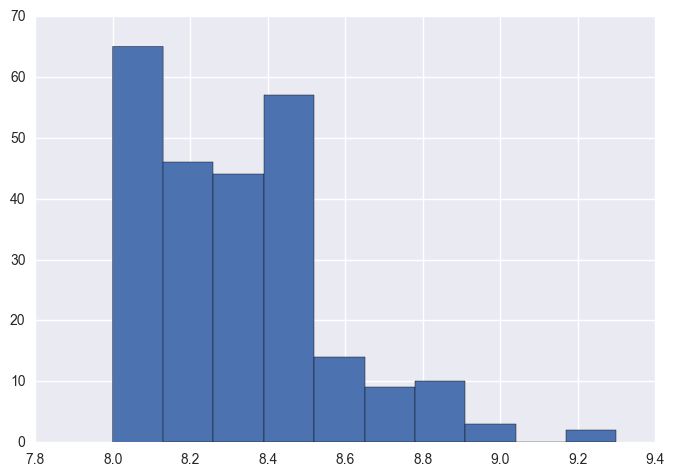

In [201]:
# histogram of imdbRatings
dfx['imdbRating'].hist()

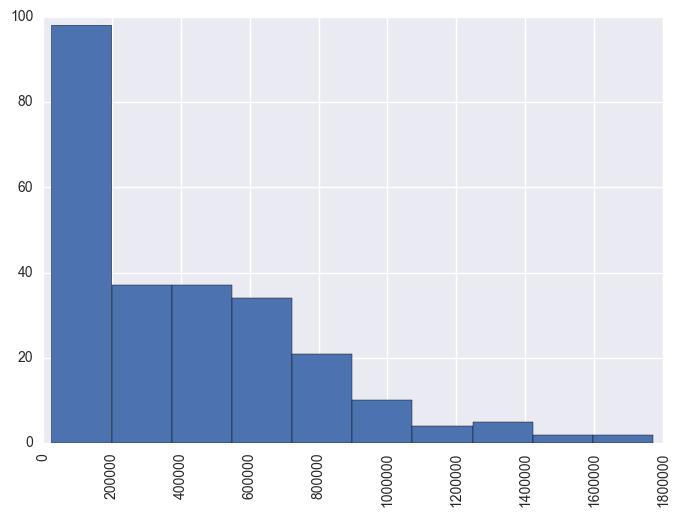

In [202]:
# Histogram of number of votes for each movie
dfx['imdbVotes'].hist(xrot=90)

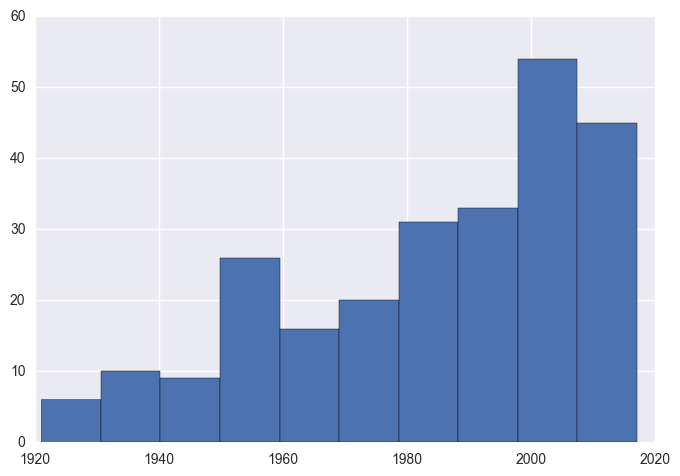

In [203]:
# Histogram of year released
dfx['Year'].hist()

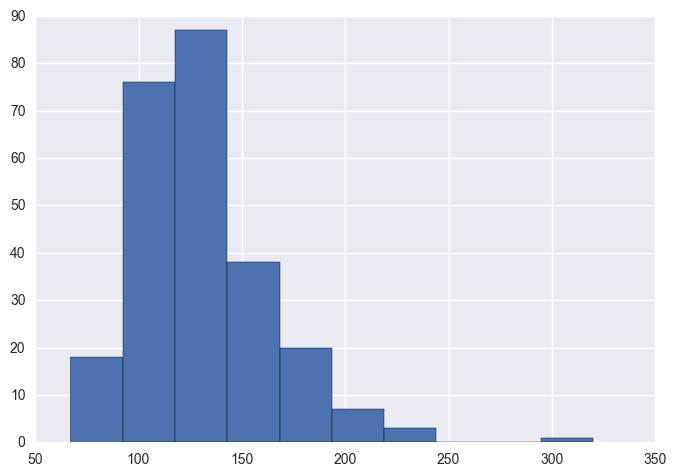

In [204]:
# Histogram of movie runtimes
dfx['Runtime'].hist()

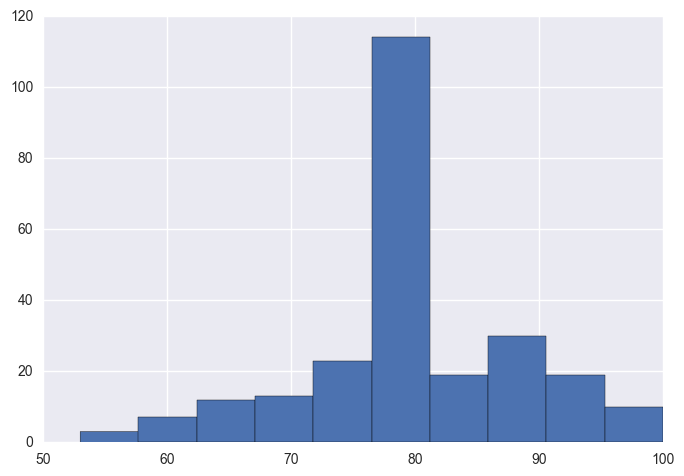

In [205]:
# histogram of metascores
dfx['Metascore'].hist()

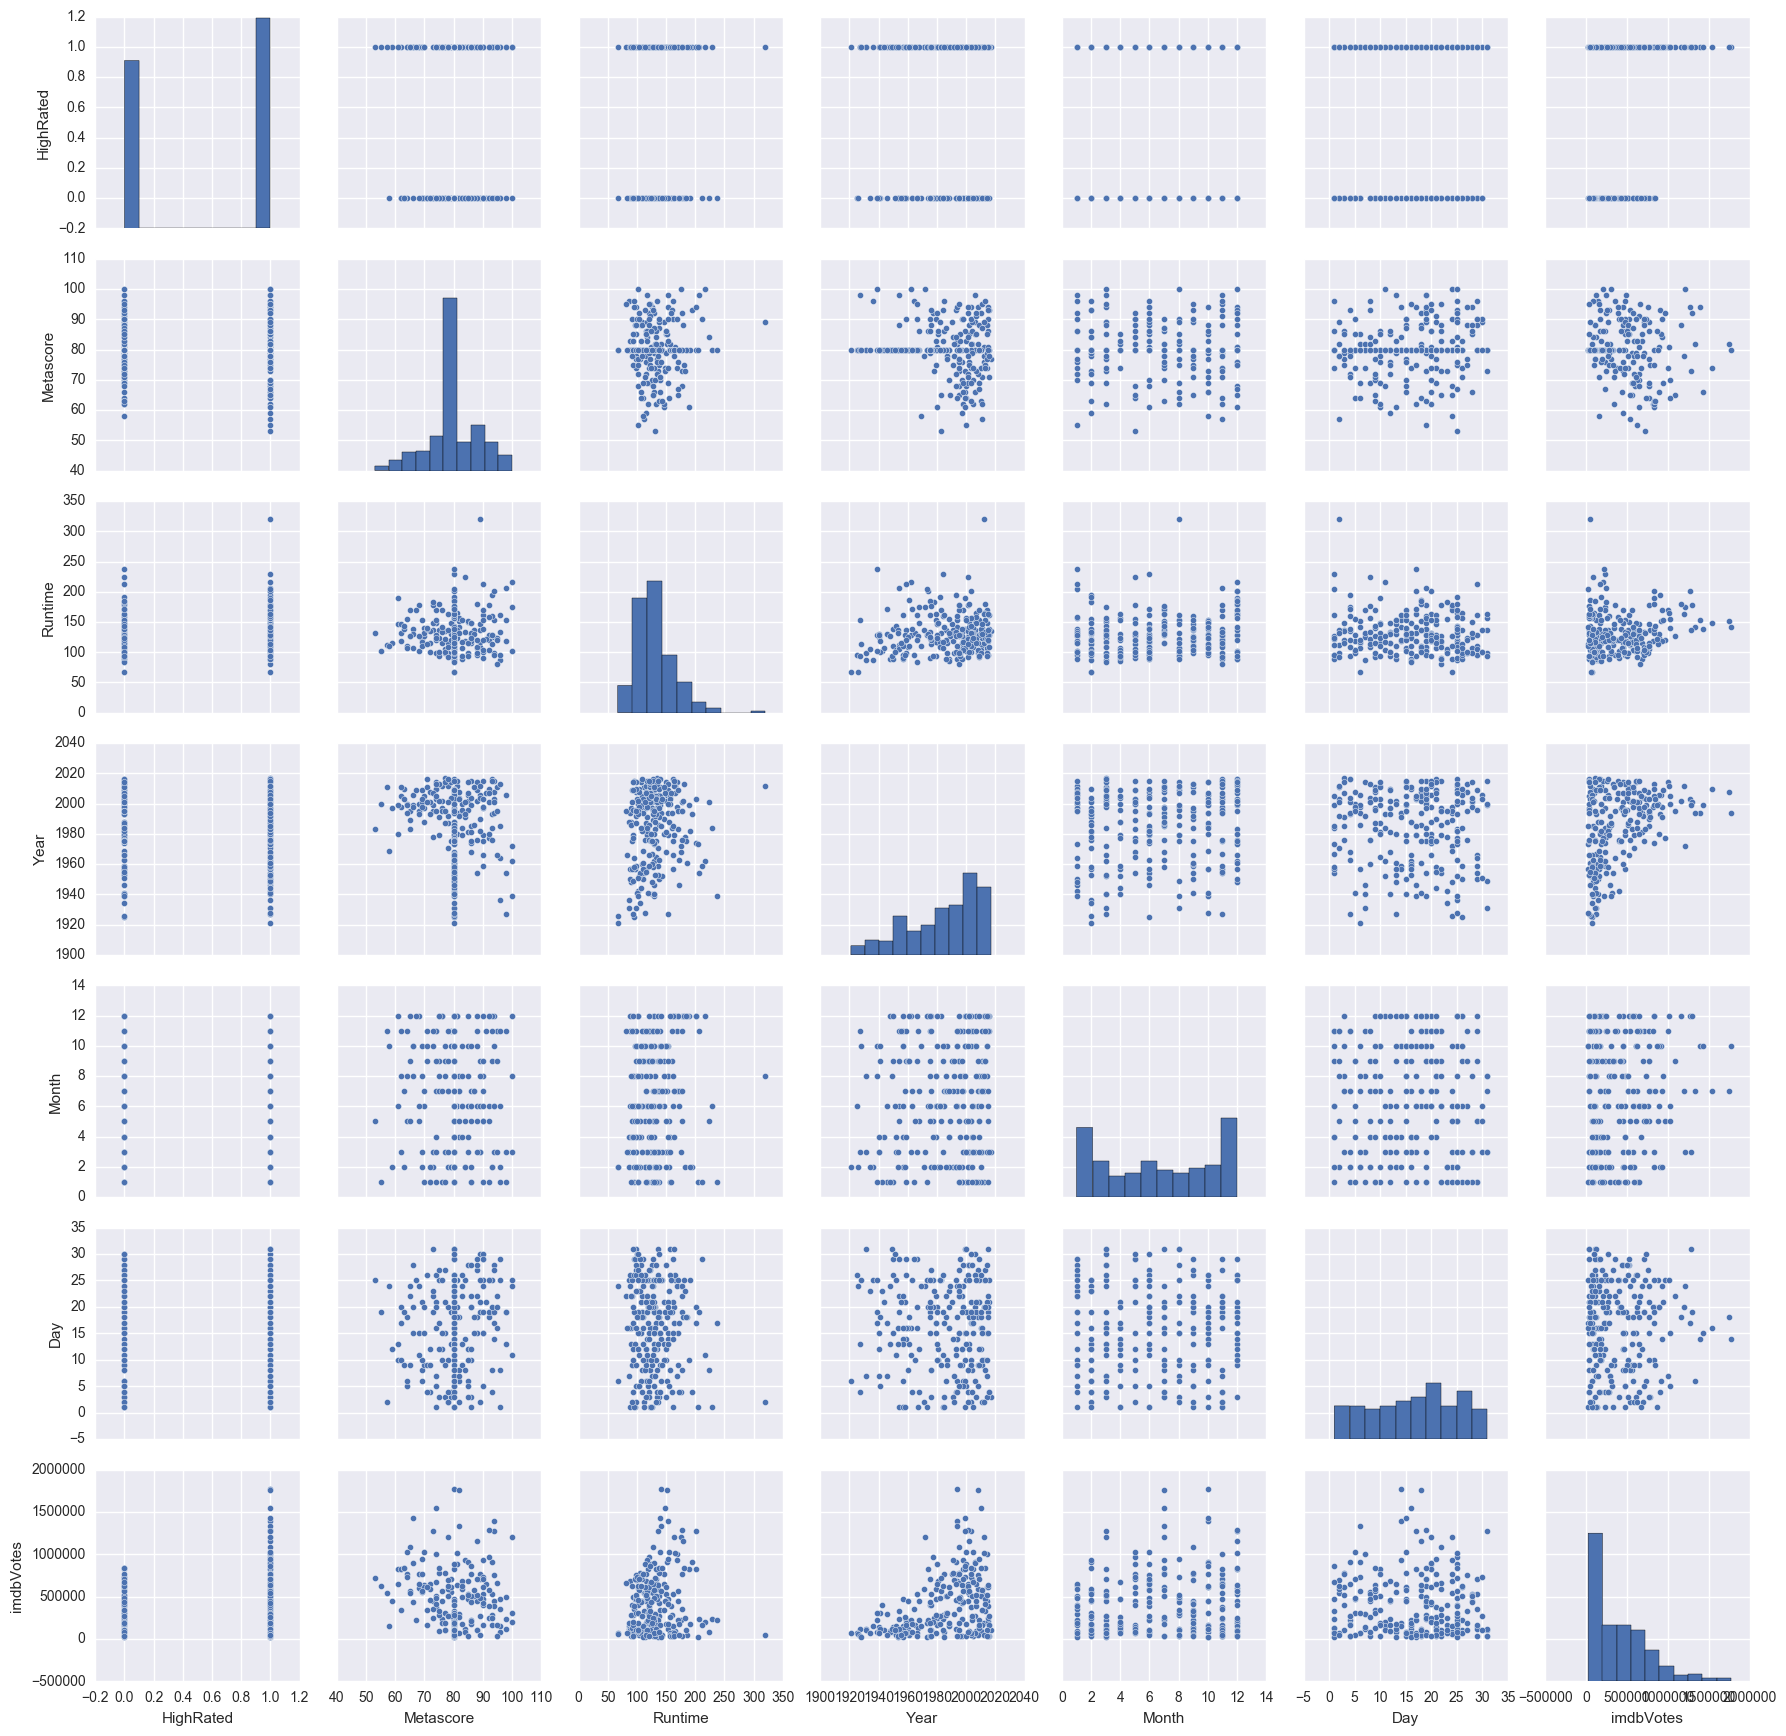

In [184]:
import seaborn as sns

# made a pairplot to try to find any other relationships in the data
sns.pairplot(dfx2)